In [1]:
# General importings
import os
import sys
import glob
import logging
import math
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import expon
import matplotlib.mlab as mlab
import scipy.optimize
from scipy import integrate
from scipy.integrate import simps
import json

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

## Setting Parameters

In [3]:
barn = 1e-24 #cm2
migdal_branching = 4.6e-6
fluo_yield = 0.89
scaling_factor = 0.280
nucleus = 5.81e24
Xeatom = 131
flux = 1000 #/cm2/s

m_neutron = (939.565e+3) #keV
m_Xe =  131.293*(931.5e+3) #keV
mu_N = m_neutron*m_Xe/(m_neutron+m_Xe)

mass = 5000. #g
NA = 6.022e23
Xe_mass = 131.29 #u
Xe_mass_g = Xe_mass/NA
N_xe = mass/Xe_mass_g
detector_volume = 50*50*50 #cm3
N_xe_vol = N_xe/detector_volume
N_xe_vol

source = 'YBe'  # 'paper', 'YBe', 'SbBe'
energ_level = '1s' # '1s'
activity = 'Collar' # 'LSC' or 'Collar'
gas = 'Depleted' # 'Enriched', 'Depleted', 'Xe129', 'Xe131', Xe132', Xe134', Xe136'

In [4]:
if(source == 'paper'):
    E_neutron = 500 #keV
elif(source == 'YBe'):
    E_neutron = 140 #keV reality 152keV
elif(source == 'SbBe'):
    E_neutron = 20 #keV reality 24keV

In [5]:
if(energ_level == '1s'):
    E_nl = 35 #keV
    E_dexX = 29.6 #keV
    E_dexe = E_nl-E_dexX
elif(energ_level == '2s'):
    E_nl = 5.4 #keV
    E_dexX = 4.9 #keV
    E_dexe = E_nl-E_dexX

In [6]:
frac = mu_N*mu_N*E_neutron/(m_Xe*m_neutron)
frac

1.0592122739864653

In [7]:
def energyRC(E_e, costheta):
    frac = mu_N*mu_N*E_neutron/(m_Xe*m_neutron)
    deltaE = E_e + E_nl
    ratio = deltaE*m_neutron/(mu_N*E_neutron)
    
    E_NR = frac*(np.power(1-(np.sqrt(1-ratio)), 2)+2*(1-costheta)*np.sqrt(1-ratio))
    
    return E_NR

In [8]:
Dist_prob_1s = [1.0131066e-14 ,
1.0133886e-14 ,
1.0136812e-14 ,
1.0139846e-14 ,
1.0142991e-14 ,
1.0146249e-14 ,
1.0149624e-14 ,
1.0153117e-14 ,
1.0156731e-14 ,
1.0160467e-14 ,
1.0164329e-14 ,
1.0168317e-14 ,
1.0172432e-14 ,
1.0176677e-14 ,
1.0181051e-14 ,
1.0185555e-14 ,
1.0190189e-14 ,
1.0194952e-14 ,
1.0199844e-14 ,
1.0204862e-14 ,
1.0210003e-14 ,
1.0215266e-14 ,
1.0220645e-14 ,
1.0226135e-14 ,
1.0231731e-14 ,
1.0237426e-14 ,
1.024321e-14 ,
1.0249075e-14 ,
1.025501e-14 ,
1.0261001e-14 ,
1.0267034e-14 ,
1.0273093e-14 ,
1.0279161e-14 ,
1.0285217e-14 ,
1.0291238e-14 ,
1.0297201e-14 ,
1.0303079e-14 ,
1.0308841e-14 ,
1.0314457e-14 ,
1.0319891e-14 ,
1.0325106e-14 ,
1.0330062e-14 ,
1.0334716e-14 ,
1.0339023e-14 ,
1.0342934e-14 ,
1.0346399e-14 ,
1.0349366e-14 ,
1.0351782e-14 ,
1.035359e-14 ,
1.0354737e-14 ,
1.0355166e-14 ,
1.0354825e-14 ,
1.0353663e-14 ,
1.0351636e-14 ,
1.0348704e-14 ,
1.0344838e-14 ,
1.0340021e-14 ,
1.0334253e-14 ,
1.0327552e-14 ,
1.0319963e-14 ,
1.0311563e-14 ,
1.0302468e-14 ,
1.029284e-14 ,
1.0282901e-14 ,
1.0272941e-14 ,
1.0263263e-14 ,
1.0253968e-14 ,
1.0245095e-14 ,
1.0236683e-14 ,
1.0228762e-14 ,
1.0221357e-14 ,
1.0214481e-14 ,
1.0208136e-14 ,
1.0202305e-14 ,
1.0196949e-14 ,
1.0192003e-14 ,
1.0187369e-14 ,
1.0182907e-14 ,
1.0178425e-14 ,
1.0173675e-14 ,
1.0168332e-14 ,
1.0162012e-14 ,
1.0154555e-14 ,
1.0145998e-14 ,
1.0136418e-14 ,
1.0125933e-14 ,
1.0114715e-14 ,
1.0103002e-14 ,
1.0091109e-14 ,
1.0079445e-14 ,
1.006842e-14 ,
1.0058123e-14 ,
1.0048551e-14 ,
1.0039674e-14 ,
1.0031432e-14 ,
1.0023722e-14 ,
1.0016394e-14 ,
1.0009236e-14 ,
1.0001962e-14 ,
9.9942123e-15 ,
9.9858047e-15 ,
9.9767882e-15 ,
9.9672476e-15 ,
9.9573011e-15 ,
9.9471077e-15 ,
9.9368749e-15 ,
9.9268605e-15 ,
9.9172016e-15 ,
9.9078736e-15 ,
9.898822e-15 ,
9.8899635e-15 ,
9.8811784e-15 ,
9.8723041e-15 ,
9.8632036e-15 ,
9.8538579e-15 ,
9.8442617e-15 ,
9.8344085e-15 ,
9.8242906e-15 ,
9.8138981e-15 ,
9.8032233e-15 ,
9.7922726e-15 ,
9.7810581e-15 ,
9.7695955e-15 ,
9.757893e-15 ,
9.7458933e-15 ,
9.733498e-15 ,
9.7205811e-15 ,
9.7069834e-15 ,
9.6925689e-15 ,
9.6773935e-15 ,
9.6615887e-15 ,
9.6453322e-15 ,
9.6287623e-15 ,
9.6117057e-15 ,
9.5938582e-15 ,
9.5748436e-15 ,
9.5544967e-15 ,
9.5329522e-15 ,
9.5104185e-15 ,
9.4871471e-15 ,
9.4631164e-15 ,
9.4380797e-15 ,
9.4117785e-15 ,
9.3841421e-15 ,
9.3551654e-15 ,
9.3248562e-15 ,
9.2932233e-15 ,
9.2602833e-15 ,
9.2260699e-15 ,
9.1906307e-15 ,
9.1540295e-15 ,
9.1162245e-15 ,
9.0770111e-15 ,
9.0361612e-15 ,
8.9937572e-15 ,
8.9500909e-15 ,
8.9050882e-15 ,
8.8583771e-15 ,
8.8097606e-15 ,
8.7595329e-15 ,
8.7079821e-15 ,
8.6546917e-15 ,
8.5992498e-15 ,
8.5419587e-15 ,
8.4831023e-15 ,
8.4222734e-15 ,
8.3592089e-15 ,
8.2940568e-15 ,
8.2268724e-15 ,
8.1575682e-15 ,
8.0860916e-15 ,
8.0123903e-15 ,
7.9363317e-15 ,
7.8579482e-15 ,
7.7772801e-15 ,
7.6936875e-15 ,
7.6072791e-15 ,
7.5189112e-15 ,
7.4279481e-15 ,
7.3341762e-15 ,
7.2375927e-15 ,
7.1377658e-15 ,
7.0354462e-15 ,
6.9305557e-15 ,
6.8227234e-15 ,
6.7121489e-15 ,
6.5988127e-15 ,
6.4824951e-15 ,
6.3636522e-15 ,
6.242267e-15 ,
6.1183469e-15 ,
5.9919894e-15 ,
5.863323e-15 ,
5.7324075e-15 ,
5.5993304e-15 ,
5.4642796e-15 ,
5.3273348e-15 ,
5.1886957e-15 ,
5.0484786e-15 ,
4.9070524e-15 ,
4.7641671e-15 ,
4.6202277e-15 ,
4.4753981e-15 ,
4.3299054e-15 ,
4.1839895e-15 ,
4.0379714e-15 ,
3.8918907e-15 ,
3.7459458e-15 ,
3.6005283e-15 ,
3.4558175e-15 ,
3.3121618e-15 ,
3.1696647e-15 ,
3.028775e-15 ,
2.8894968e-15 ,
2.7522513e-15 ,
2.6171862e-15 ,
2.4845954e-15 ,
2.3546071e-15 ,
2.2275332e-15 ,
2.1035352e-15 ,
1.9828532e-15 ,
1.8655697e-15 ,
1.7519386e-15 ,
1.6420073e-15 ,
1.5359967e-15 ,
1.4339177e-15 ,
1.3359334e-15 ,
1.2420948e-15 ,
1.1524729e-15 ,
1.0670554e-15 ,
9.8586688e-16 ,
9.0888961e-16 ,
8.3607294e-16 ,
7.6743632e-16 ,
7.0287604e-16 ,
6.4232988e-16 ,
5.856678e-16 ,
5.3281552e-16 ,
4.8362507e-16 ,
4.3797396e-16 ,
3.9572375e-16 ,
3.5674098e-16 ,
3.2087209e-16 ,
2.8793958e-16 ,
2.5780295e-16 ,
2.3028496e-16 ,
2.0522436e-16 ,
1.8248507e-16 ,
1.6189383e-16 ,
1.4330527e-16 ,
1.2655909e-16 ]

In [9]:
Dist_prob_2s = [0.25385091E-12,
                0.25392905E-12,
                0.25400990E-12, 
                0.25409353E-12,
                0.25417997E-12,
                0.25426927E-12,
                0.25436145E-12,
                0.25445655E-12,
                0.25455458E-12,
                0.25465557E-12,
                0.25475950E-12,
                0.25486637E-12,
                0.25497616E-12,
                0.25508884E-12,
                0.25520434E-12,
                0.25532262E-12,
                0.25544358E-12,
                0.25556711E-12,
                0.25569309E-12,
                0.25582136E-12,
                0.25595175E-12,
                0.25608404E-12,
                0.25621799E-12,
                0.25635332E-12,
                0.25648972E-12,
                0.25662684E-12,
                0.25676428E-12,
                0.25690158E-12,
                0.25703827E-12,
                0.25717379E-12,
                0.25730754E-12,
                0.25743887E-12,
                0.25756704E-12,
                0.25769128E-12,
                0.25781075E-12,
                0.25792451E-12,
                0.25803161E-12,
                0.25813097E-12,
                0.25822150E-12,
                0.25830203E-12,
                0.25837131E-12,
                0.25842806E-12,
                0.25847097E-12,
                0.25849868E-12,
                0.25850983E-12,
                0.25850306E-12,
                0.25847706E-12,
                0.25843057E-12,
                0.25836245E-12,
                0.25827171E-12,
                0.25815757E-12,
                0.25801954E-12,
                0.25785753E-12,
                0.25767188E-12,
                0.25746355E-12,
                0.25723425E-12,
                0.25698661E-12,
                0.25672434E-12,
                0.25645255E-12,
                0.25617798E-12,
                0.25590933E-12,
                0.25565537E-12,
                0.25541826E-12,
                0.25519819E-12,
                0.25499483E-12,
                0.25480720E-12,
                0.25463350E-12,
                0.25447093E-12,
                0.25431544E-12,
                0.25416146E-12,
                0.25400159E-12,
                0.25382623E-12,
                0.25362722E-12,
                0.25340289E-12,
                0.25315259E-12,
                0.25287602E-12,
                0.25257323E-12,
                0.25224480E-12,
                0.25189195E-12,
                0.25151663E-12,
                0.25112179E-12,
                0.25071149E-12,
                0.25029122E-12,
                0.24986812E-12,
                0.24945118E-12,
                0.24904593E-12,
                0.24865161E-12,
                0.24826625E-12,
                0.24788678E-12,
                0.24750884E-12,
                0.24712645E-12,
                0.24673168E-12,
                0.24631707E-12,
                0.24588137E-12,
                0.24542471E-12,
                0.24494749E-12,
                0.24445047E-12,
                0.24393486E-12,
                0.24340238E-12,
                0.24285539E-12,
                0.24229664E-12,
                0.24172653E-12,
                0.24114400E-12,
                0.24054759E-12,
                0.23993543E-12,
                0.23930504E-12,
                0.23865412E-12,
                0.23798215E-12,
                0.23728898E-12,
                0.23657455E-12,
                0.23583889E-12,
                0.23508209E-12,
                0.23430397E-12,
                0.23350316E-12,
                0.23267780E-12,
                0.23182553E-12,
                0.23094352E-12,
                0.23002943E-12,
                0.22908196E-12,
                0.22809980E-12,
                0.22708148E-12,
                0.22602550E-12,
                0.22493072E-12,
                0.22379617E-12,
                0.22262087E-12,
                0.22140379E-12,
                0.22014299E-12,
                0.21883584E-12,
                0.21747929E-12,
                0.21607110E-12,
                0.21461174E-12,
                0.21310262E-12,
                0.21154568E-12,
                0.20993837E-12,
                0.20827238E-12,
                0.20653791E-12,
                0.20473264E-12,
                0.20286100E-12,
                0.20092942E-12,
                0.19894115E-12,
                0.19689035E-12,
                0.19476993E-12,
                0.19257800E-12,
                0.19031473E-12,
                0.18798103E-12,
                0.18558062E-12,
                0.18311827E-12,
                0.18059213E-12,
                0.17799662E-12,
                0.17532730E-12,
                0.17259355E-12,
                0.16980270E-12,
                0.16694625E-12,
                0.16401329E-12,
                0.16102381E-12,
                0.15800789E-12,
                0.15494126E-12,
                0.15178716E-12,
                0.14856111E-12,
                0.14529809E-12,
                0.14199760E-12,
                0.13865412E-12,
                0.13526316E-12,
                0.13183139E-12,
                0.12837180E-12,
                0.12488146E-12,
                0.12135763E-12,
                0.11781122E-12,
                0.11424741E-12,
                0.11066985E-12,
                0.10708783E-12,
                0.10350241E-12,
                0.99915327E-13,
                0.96335604E-13,
                0.92769573E-13,
                0.89217574E-13,
                0.85686777E-13,
                0.82190316E-13,
                0.78727204E-13,
                0.75302927E-13,
                0.71923922E-13,
                0.68591510E-13,
                0.65314993E-13,
                0.62104176E-13,
                0.58957030E-13,
                0.55885979E-13,
                0.52881556E-13,
                0.49946596E-13,
                0.47116605E-13,
                0.44364669E-13,
                0.41703871E-13,
                0.39134927E-13,
                0.36661005E-13,
                0.34281769E-13,
                0.32002200E-13,
                0.29821107E-13,
                0.27739218E-13,
                0.25756397E-13,
                0.23872251E-13,
                0.22085896E-13,
                0.20395764E-13,
                0.18800686E-13,
                0.17298211E-13,
                0.15886834E-13,
                0.14563789E-13,
                0.13326598E-13,
                0.12172002E-13,
                0.11096717E-13,
                0.10098029E-13,
                0.91723348E-14,
                0.83165380E-14,
                0.75267293E-14,
                0.67999519E-14,
                0.61319336E-14,
                0.55198229E-14,
                0.49600308E-14,
                0.44489630E-14,
                0.39835687E-14,
                0.35607492E-14,
                0.31772682E-14,
                0.28302380E-14,
                0.25167404E-14,
                0.22342519E-14,
                0.19800842E-14,
                0.17519545E-14,
                0.15473323E-14,
                0.13647491E-14,
                0.12015587E-14,
                0.10562176E-14,
                0.92697569E-15,
                0.81225436E-15,
                0.71061503E-15,
                0.62074242E-15,
                0.54139824E-15,
                0.47148034E-15,
                0.40997269E-15,
                0.35595428E-15,
                0.30859320E-15,
                0.26714628E-15,
                0.23091817E-15,
                0.19931368E-15,
                0.17178615E-15,
                0.14785330E-15,
                0.12707395E-15,
                0.10906454E-15,
                0.93470251E-16,
                0.79988187E-16,
                0.68362053E-16,
                0.58346660E-16,
                0.49731872E-16,
                0.42330896E-16]

In [10]:
E_e_theo = [1e+00  ,
1.0456357e+00  ,
1.093354e+00  ,
1.1432499e+00  ,
1.1954229e+00  ,
1.2499768e+00  ,
1.3070204e+00  ,
1.3666671e+00  ,
1.4290359e+00  ,
1.4942509e+00  ,
1.5624421e+00  ,
1.6337452e+00  ,
1.7083022e+00  ,
1.7862617e+00  ,
1.867779e+00  ,
1.9530164e+00  ,
2.0421436e+00  ,
2.1353382e+00  ,
2.2327858e+00  ,
2.3346805e+00  ,
2.4412252e+00  ,
2.5526322e+00  ,
2.6691232e+00  ,
2.7909305e+00  ,
2.9182965e+00  ,
3.0514749e+00  ,
3.190731e+00  ,
3.3363422e+00  ,
3.4885984e+00  ,
3.647803e+00  ,
3.8142729e+00  ,
3.9883398e+00  ,
4.1703504e+00  ,
4.3606672e+00  ,
4.5596692e+00  ,
4.7677528e+00  ,
4.9853324e+00  ,
5.2128414e+00  ,
5.4507329e+00  ,
5.6994808e+00  ,
5.9595804e+00  ,
6.2315499e+00  ,
6.5159309e+00  ,
6.8132898e+00  ,
7.1242189e+00  ,
7.4493374e+00  ,
7.789293e+00  ,
8.1447626e+00  ,
8.5164544e+00  ,
8.9051085e+00  ,
9.3114992e+00  ,
9.7364357e+00  ,
1.0180765e+01  ,
1.0645371e+01  ,
1.1131179e+01  ,
1.1639158e+01  ,
1.2170319e+01  ,
1.272572e+01  ,
1.3306467e+01  ,
1.3913716e+01  ,
1.4548678e+01  ,
1.5212617e+01  ,
1.5906855e+01  ,
1.6632775e+01  ,
1.7391823e+01  ,
1.818551e+01  ,
1.9015418e+01  ,
1.98832e+01  ,
2.0790583e+01  ,
2.1739375e+01  ,
2.2731466e+01  ,
2.3768832e+01  ,
2.4853539e+01  ,
2.5987747e+01  ,
2.7173715e+01  ,
2.8413806e+01  ,
2.9710489e+01  ,
3.1066348e+01  ,
3.2484081e+01  ,
3.3966514e+01  ,
3.5516599e+01  ,
3.7137423e+01  ,
3.8832214e+01  ,
4.0604349e+01  ,
4.2457356e+01  ,
4.4394926e+01  ,
4.6420918e+01  ,
4.8539368e+01  ,
5.0754495e+01  ,
5.3070711e+01  ,
5.5492628e+01  ,
5.8025072e+01  ,
6.0673085e+01  ,
6.3441942e+01  ,
6.6337158e+01  ,
6.9364499e+01  ,
7.2529995e+01  ,
7.583995e+01  ,
7.9300958e+01  ,
8.291991e+01  ,
8.6704016e+01  ,
9.0660813e+01  ,
9.479818e+01  ,
9.9124359e+01  ,
1.0364797e+02  ,
1.0837801e+02  ,
1.1332391e+02  ,
1.1849553e+02  ,
1.2390315e+02  ,
1.2955756e+02  ,
1.3547e+02  ,
1.4165227e+02  ,
1.4811666e+02  ,
1.5487607e+02  ,
1.6194394e+02  ,
1.6933436e+02  ,
1.7706205e+02  ,
1.851424e+02  ,
1.935915e+02  ,
2.0242617e+02  ,
2.1166403e+02  ,
2.2132346e+02  ,
2.3142371e+02  ,
2.4198488e+02  ,
2.5302803e+02  ,
2.6457513e+02  ,
2.766492e+02  ,
2.8927427e+02  ,
3.024755e+02  ,
3.1627917e+02  ,
3.3071278e+02  ,
3.4580508e+02  ,
3.6158613e+02  ,
3.7808736e+02  ,
3.9534163e+02  ,
4.1338331e+02  ,
4.3224834e+02  ,
4.5197428e+02  ,
4.7260044e+02  ,
4.9416788e+02  ,
5.1671956e+02  ,
5.4030041e+02  ,
5.6495738e+02  ,
5.9073959e+02  ,
6.1769839e+02  ,
6.4588748e+02  ,
6.7536299e+02  ,
7.0618363e+02  ,
7.384108e+02  ,
7.7210867e+02  ,
8.0734438e+02  ,
8.4418808e+02  ,
8.8271317e+02  ,
9.2299639e+02  ,
9.6511795e+02  ,
1.0091618e+03  ,
1.0552155e+03  ,
1.103371e+03  ,
1.1537241e+03  ,
1.2063751e+03  ,
1.2614288e+03  ,
1.318995e+03  ,
1.3791882e+03  ,
1.4421284e+03  ,
1.5079409e+03  ,
1.5767568e+03  ,
1.6487131e+03  ,
1.7239533e+03  ,
1.802627e+03  ,
1.8848911e+03  ,
1.9709094e+03  ,
2.0608532e+03  ,
2.1549016e+03  ,
2.253242e+03  ,
2.3560703e+03  ,
2.4635911e+03  ,
2.5760188e+03  ,
2.6935771e+03  ,
2.8165003e+03  ,
2.9450332e+03  ,
3.0794318e+03  ,
3.2199637e+03  ,
3.366909e+03  ,
3.5205601e+03  ,
3.6812233e+03  ,
3.8492184e+03  ,
4.02488e+03  ,
4.2085582e+03  ,
4.4006186e+03  ,
4.6014438e+03  ,
4.8114338e+03  ,
5.0310068e+03  ,
5.2606002e+03  ,
5.5006712e+03  ,
5.7516981e+03  ,
6.0141807e+03  ,
6.2886419e+03  ,
6.5756283e+03  ,
6.8757115e+03  ,
7.1894893e+03  ,
7.5175865e+03  ,
7.8606566e+03  ,
8.219383e+03  ,
8.5944801e+03  ,
8.986695e+03  ,
9.3968089e+03  ,
9.8256386e+03  ,
1.0274038e+04  ,
1.0742901e+04  ,
1.123316e+04  ,
1.1745793e+04  ,
1.228182e+04  ,
1.284231e+04  ,
1.3428377e+04  ,
1.404119e+04  ,
1.4681969e+04  ,
1.5351991e+04  ,
1.6052589e+04  ,
1.678516e+04  ,
1.7551162e+04  ,
1.8352121e+04  ,
1.9189633e+04  ,
2.0065365e+04  ,
2.0981061e+04  ,
2.1938546e+04  ,
2.2939727e+04  ,
2.3986596e+04  ,
2.5081241e+04  ,
2.622584e+04  ,
2.7422674e+04  ,
2.8674126e+04  ,
2.998269e+04  ,
3.135097e+04  ,
3.2781693e+04  ,
3.4277707e+04  ,
3.5841994e+04  ,
3.7477667e+04  ,
3.9187986e+04  ,
4.0976356e+04  ,
4.284634e+04  ,
4.4801661e+04  ,
4.6846215e+04  ,
4.8984074e+04  ,
5.1219495e+04  ,
5.3556932e+04  ,
5.6001038e+04  ,
5.8556683e+04  ,
6.1228957e+04  ,
6.4023182e+04  ,
6.6944923e+04  ,
7e+04 ]
E_e_theo_keV = []
for val in E_e_theo:
    E_e_theo_keV.append(val*0.001)

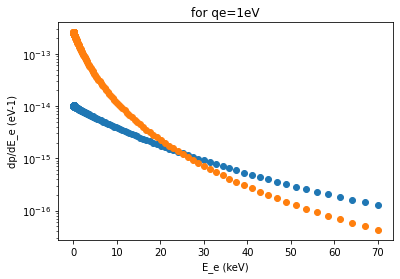

In [11]:
fig, ax = plt.subplots()
ax.scatter(E_e_theo_keV,Dist_prob_1s)
ax.scatter(E_e_theo_keV,Dist_prob_2s)
#ax.set_ylim([0, 0.35])
plt.title('for qe=1eV')
plt.ylabel('dp/dE_e (eV-1)')
plt.xlabel('E_e (keV)')
plt.yscale('log')

In [12]:
Dist_prob_1s_renom, Dist_prob_2s_renom = [],[]
renorm = np.power(511,2)*1e3
for val in Dist_prob_1s:
    Dist_prob_1s_renom.append(val*renorm)
for val in Dist_prob_2s:
    Dist_prob_2s_renom.append(val*renorm)

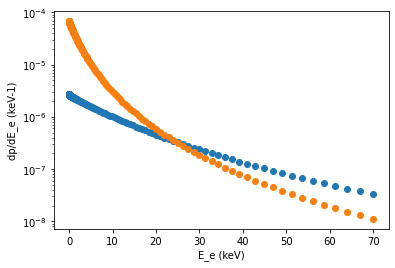

In [13]:
fig, ax = plt.subplots()
ax.scatter(E_e_theo_keV,Dist_prob_1s_renom)
ax.scatter(E_e_theo_keV,Dist_prob_2s_renom)
#ax.set_ylim([0, 0.35])
#plt.title('for qe=1eV')
plt.ylabel('dp/dE_e (keV-1)')
plt.xlabel('E_e (keV)')
plt.yscale('log')

In [14]:
theta_xs, xs_xe129_angular, xs_xe131_angular, xs_xe132_angular, xs_xe134_angular, xs_xe136_angular =[],[],[],[],[],[]

if(source == 'paper'): val = 2
elif(source == 'YBe'): val = 1
elif(source == 'SbBe'): val = 0
    
f = open('/home/almazan/data_xe129.json',"r")
data = json.load(f)
nentries = data['funcs'][val]['i1x']-1
for i in range(0, nentries):
    theta_xs.append(data['funcs'][val]['pts'][i]['x'])
    xs_xe129_angular.append(data['funcs'][val]['pts'][i]['y'])
    
f = open('/home/almazan/data_xe131.json',"r")
data = json.load(f)
for i in range(0, nentries):
    xs_xe131_angular.append(data['funcs'][val]['pts'][i]['y'])
    
f = open('/home/almazan/data_xe132.json',"r")
data = json.load(f)
for i in range(0, nentries):
    xs_xe132_angular.append(data['funcs'][val]['pts'][i]['y'])
    
f = open('/home/almazan/data_xe134.json',"r")
data = json.load(f)
for i in range(0, nentries):
    xs_xe134_angular.append(data['funcs'][val]['pts'][i]['y'])
    
f = open('/home/almazan/data_xe136.json',"r")
data = json.load(f)
for i in range(0, nentries):
    xs_xe136_angular.append(data['funcs'][val]['pts'][i]['y'])
    


In [15]:
theta_xs_inrad =[]
for the in theta_xs:
    theta_xs_inrad.append(the*np.pi/180)
costheta_xs = np.cos(theta_xs_inrad)

xs_xe131_costheta, xs_xe136_costheta, xs_xe129_costheta, xs_xe132_costheta, xs_xe134_costheta = [], [], [], [], []
for xs in xs_xe131_angular:
    xs_xe131_costheta.append(2*np.pi*xs)
for xs in xs_xe136_angular:
    xs_xe136_costheta.append(2*np.pi*xs)
for xs in xs_xe129_angular:
    xs_xe129_costheta.append(2*np.pi*xs)
for xs in xs_xe132_angular:
    xs_xe132_costheta.append(2*np.pi*xs)
for xs in xs_xe134_angular:
    xs_xe134_costheta.append(2*np.pi*xs)

In [16]:
len(xs_xe129_costheta)

160

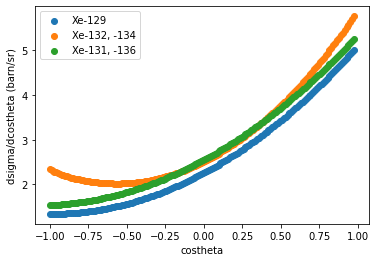

In [17]:
fig, ax = plt.subplots()
ax.scatter(costheta_xs,xs_xe129_costheta, label = 'Xe-129')
ax.scatter(costheta_xs,xs_xe132_costheta, label = 'Xe-132, -134')
ax.scatter(costheta_xs,xs_xe131_costheta, label = 'Xe-131, -136')
#ax.set_ylim([0, 0.35])

plt.ylabel('dsigma/dcostheta (barn/sr)')
plt.xlabel('costheta')
plt.legend(loc=0)

theta_xs, xs_xe129_angular, xs_xe131_angular, xs_xe132_angular, xs_xe134_angular, xs_xe136_angular =[],[],[],[],[],[]

if(source == 'paper'):
    # Taken from ENDF/B-VIII.0
    theta_xs=[180, 156.272, 146.206, 138.308, 131.492, 125.338, 122.438, 119.63, 114.237, 109.069,
    104.065, 99.1743, 94.3562, 89.5748,84.7963, 79.9872, 75.1115, 70.1289, 64.9903, 59.6331, 53.9708,
    47.8743, 41.1299, 33.3237, 23.3877, 0]
    
    xs_xe131_angular =[0.29206, 0.255 ,0.22607, 0.20491, 0.19117, 0.18458, 0.18388, 0.18488, 0.19188, 0.20543,
    0.22539, 0.2517, 0.28432 , 0.32325, 0.36854, 0.42027, 0.47856, 0.54359, 0.61555, 0.6947, 0.78134,
    0.87579, 0.97845, 1.0897, 1.2101, 1.3402] #barn/sr
    
    xs_xe136_angular =[0.29206, 0.255, 0.22607, 0.20491, 0.19117, 0.18458, 0.18388, 0.18488, 0.19188, 0.20543, 
                   0.22539, 0.2517, 0.28432, 0.32325, 0.36854, 0.42027, 0.47856, 0.54359, 0.61555, 0.6947, 
                0.78134, 0.87579, 0.97845, 1.0897, 1.2101, 1.3402]
    
    xs_xe129_angular =[0.21019, 0.17903, 0.13155, 0.11485, 0.10263, 0.091037, 0.090728, 0.091427, 0.095807, 0.1041,
                   0.13219, 0.15191, 0.20263, 0.23365, 0.26848, 0.34979, 0.39641, 0.44714, 0.56137, 0.62514,
                   0.76682, 0.84509, 0.92859, 1.0176, 1.1122, 1.3198]
    
    xs_xe132_angular =[0.30027, 0.26139, 0.23113, 0.2091, 0.19497, 0.18842, 0.18791, 0.18921, 0.19712, 0.21198, 0.23367, 
                   0.26211, 0.29725, 0.33908, 0.38766, 0.44305, 0.50538, 0.57482, 0.65156, 0.73587, 0.82803, 0.92838,
                   1.0373, 1.1553, 1.2827, 1.4201]
    
    xs_xe134_angular =[0.30476, 0.26571, 0.23528, 0.21307, 0.19874, 0.19199, 0.19137, 0.19255, 0.20023, 0.21484, 0.23627, 
                   0.26442, 0.29927, 0.34081, 0.38908, 0.44417, 0.5062, 0.57535, 0.65182, 0.73588, 0.82782, 0.928,
                   1.0368, 1.1547, 1.2821, 1.4197]


In [18]:
#129, 131, 132, 134, 136
depletedXe_comp = [0.29087614581112764,0.28853123001492215,0.30174802813898954,0.09177147729695159, 0.027073118738008953]
enrichedXe_comp = [0.0, 0.003, 0.013, 0.083, 0.901]

In [19]:
def depletedXe_xs():
    xs_total = []
    
    for i in range(0,len(costheta_xs)):
        value = depletedXe_comp[0]*xs_xe129_costheta[i]+depletedXe_comp[1]*xs_xe131_costheta[i]+depletedXe_comp[2]*xs_xe132_costheta[i]+depletedXe_comp[3]*xs_xe134_costheta[i]+depletedXe_comp[4]*xs_xe136_costheta[i]
        xs_total.append(value)
        
    return xs_total

In [20]:
def enrichedXe_xs():
    xs_total = []
    
    for i in range(0,len(costheta_xs)):
        value = enrichedXe_comp[0]*xs_xe129_costheta[i]+enrichedXe_comp[1]*xs_xe131_costheta[i]+enrichedXe_comp[2]*xs_xe132_costheta[i]+enrichedXe_comp[3]*xs_xe134_costheta[i]+enrichedXe_comp[4]*xs_xe136_costheta[i]
        xs_total.append(value)
        
    return xs_total

In [21]:
xs_xeEnriched_costheta = enrichedXe_xs()
xs_xeDepleted_costheta = depletedXe_xs()

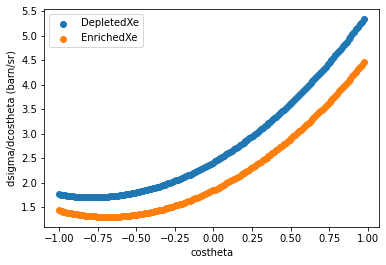

In [22]:
fig, ax = plt.subplots()
ax.scatter(costheta_xs,xs_xeDepleted_costheta, label = 'DepletedXe')
ax.scatter(costheta_xs,xs_xeEnriched_costheta, label = 'EnrichedXe')
#ax.set_ylim([0, 0.35])

plt.ylabel('dsigma/dcostheta (barn/sr)')
plt.xlabel('costheta')
plt.legend(loc=0)

In [23]:
if(gas == 'Enriched'): xs_costheta = xs_xeEnriched_costheta
elif(gas == 'Depleted'): xs_costheta = xs_xeDepleted_costheta
elif(gas == 'Xe129'): xs_costheta = xs_xe129_costheta
elif(gas == 'Xe131'): xs_costheta = xs_xe131_costheta
elif(gas == 'Xe132'): xs_costheta = xs_xe132_costheta
elif(gas == 'Xe134'): xs_costheta = xs_xe134_costheta
elif(gas == 'Xe136'): xs_costheta = xs_xe136_costheta
    
if(energ_level == '1s'): Dist_prob_renom = Dist_prob_1s_renom
elif(energ_level == '2s'): Dist_prob_renom = Dist_prob_2s_renom

In [24]:
ratio_corr = 1e+6/(np.pi*m_Xe)
ratio_ER = np.power(mu_N,2)*E_neutron/(m_neutron*m_Xe)

def p_E(E):
    value = 0.
    for i in range(0, len(E_e_theo_keV)):
        if(E <= E_e_theo_keV[i] and E > E_e_theo_keV[i-1]):
            value = Dist_prob_renom[i]
        else:
            continue
    return value
def xscostheta(costheta):
    value = 0.
    for i in range(0, len(costheta_xs)):
        if(costheta <= costheta_xs[i] and costheta > costheta_xs[i-1]):
            value = xs_costheta[i]
        else:
            continue
    return value

def fERC2(E, costheta):
    deltaE = E+E_nl
    ratio = deltaE*m_neutron/(mu_N*E_neutron)
    
    return ratio_corr*ratio_ER*np.sqrt(1-ratio)*((np.power(1-(np.sqrt(1-ratio)), 2)+2*(1-costheta))*np.sqrt(1-ratio))*xscostheta(costheta)*p_E(E)



In [25]:
xs_costheta1, xs_costheta0, xs_costheta_1  = [],[],[]
for Ei in E_e_theo_keV:
    xs_costheta1.append(fERC2(Ei,0.999))
    xs_costheta0.append(fERC2(Ei,0.))
    xs_costheta_1.append(fERC2(Ei,-0.999))

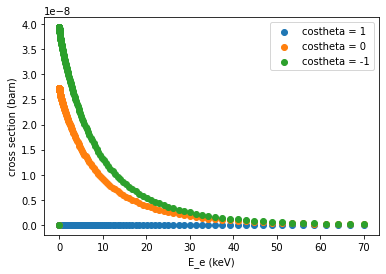

In [26]:
fig, ax = plt.subplots()
ax.scatter(E_e_theo_keV,xs_costheta1, label='costheta = 1')
ax.scatter(E_e_theo_keV,xs_costheta0, label='costheta = 0')
ax.scatter(E_e_theo_keV,xs_costheta_1, label='costheta = -1')
#ax.set_ylim([0, 0.35])

plt.ylabel('cross section (barn)')
plt.xlabel('E_e (keV)')
plt.legend(loc=1)
#plt.yscale('log')

In [27]:
xs_value, xs_error = integrate.nquad(fERC2,[[0, 69.9],[-0.999, 0.999]])

In [28]:
xs_value

4.841660761725631e-07

## Using same source and target as in Paper

In [29]:
Events_Xe = nucleus*flux*xs_value*barn*fluo_yield*24*3600
Events_Xe

216.30882498745305

## Using NEW and possible sources for LSC 

In [30]:
if (activity == 'LSC'): source_LSC = 100 #n/s
elif (activity == 'Collar'): source_LSC = 2000 #n/s
detector_surface = 50*50 #cm2
detector_source_d = 20 #cm2
solid_angle_frac = detector_surface/(4*np.pi*detector_source_d*detector_source_d)
n_flux = source_LSC*solid_angle_frac/detector_surface # 1/cm2s
print(solid_angle_frac, N_xe, n_flux )

0.4973591971621729 2.2933962982710034e+25 0.3978873577297383


In [31]:
Events_Xe = N_xe*n_flux*xs_value*barn*fluo_yield*24*3600
Events_Xe

0.33973270206546086

## Evaluating comparison between Migdal Events and Backgrounds

In [35]:
#Computing n elastic cross section for that energy level
xs_elasctic =[]
for i in costheta_xs:
  xs_elasctic.append(xscostheta(i))
n_xsection_elastic = integrate.simps(xs_elasctic,costheta_xs)
n_xsection_elastic

5.475205249461701

In [34]:
for i in range(0,100):
    migdal_evt = N_xe*n_flux*xs_value*barn*fluo_yield*24*3600*i
    n_elastic_evt = N_xe*n_flux*n_xsection_elastic*barn*24*3600*i
    print(i, migdal_evt, n_elastic_evt, np.sqrt(n_elastic_evt))


0 0.0 0.0 0.0
1 0.33973270206546086 4316715.176935644 2077.6706131953747
2 0.6794654041309217 8633430.353871288 2938.2699593249235
3 1.0191981061963826 12950145.530806933 3598.6310634471733
4 1.3589308082618434 17266860.707742576 4155.341226390749
5 1.6986635103273042 21583575.88467822 4645.812725958529
6 2.0383962123927652 25900291.061613865 5089.232855904106
7 2.378128914458226 30217006.23854951 5496.999748822034
8 2.717861616523687 34533721.41548515 5876.539918649847
9 3.057594318589148 38850436.592420794 6233.011839586124
10 3.3973270206546085 43167151.76935644 6570.171365296071
11 3.7370597227200695 47483866.94629208 6890.853861916684
12 4.0767924247855305 51800582.12322773 7197.262126894347
13 4.416525126850991 56117297.30016337 7491.147929400632
14 4.756257828916452 60434012.47709902 7773.931597145618
15 5.095990530981913 64750727.65403466 8046.783683810238
16 5.435723233047374 69067442.8309703 8310.682452781499
17 5.775455935112834 73384158.00790595 8566.455393446344
18 6.11518